## Lab | Cleaning numerical data

For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in files_for_lab folder.

##### Context
An auto insurance company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

##### Some business Objectives:

Retain customers,
Analyze relevant customer data,
Develop focused customer retention programs.
Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

##### Instructions

- Import the necessary libraries.

- Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

- First look at its main features (head, shape, info).

- Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

- Change effective to date column to datetime format.

- Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

- Plot a correlation matrix, comment what you see.

- Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

- Comment what you can see in the plots.

- Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

- Did you find outliers? Comment what you will do with them.

- Check all columns for NaN values. Decide what (if anything) you will need to do with them.

In [1]:
# Import the necessary libraries.

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

customer_df = pd.read_csv('/Users/robertkammerer/Ironhack/04_Week/day1_labs/lab-cleaning-numerical-data/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

In [3]:
# First look at its main features (head, shape, info).
display(customer_df.head())
display(customer_df.shape)
display(customer_df.dtypes)
#display(customer_df.info)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


(9134, 24)

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [4]:
# Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

col = []

for cols in customer_df.columns:
    col.append(cols.replace(' ','_').lower())
customer_df.columns = col

customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
# Change effective to date column to datetime format.

customer_df['effective_to_date']=pd.to_datetime(customer_df['effective_to_date'])

In [45]:
# Define a function that differentiates between continuous and discrete variables. 
# Hint: The number of unique values might be useful. 
# Store continuous data into a continuous_df variable and do the same for discrete_df


def cont_disc_diff(df):
    numerical = df.select_dtypes('number')
    cont = []
    disc = []
    for x in numerical.columns:
        if (numerical[x].unique().shape[0] >100):
            cont.append(x)
        else:
            disc.append(x)

    continuous_df = numerical[cont]
    discrete_df = numerical[disc]
    return continuous_df, discrete_df

continuous_df, discrete_df = cont_disc_diff(customer_df)

<AxesSubplot:>

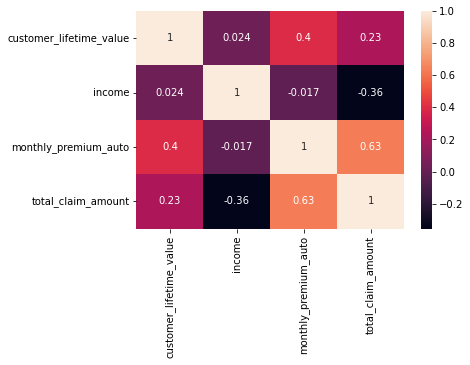

In [46]:
# Plot a correlation matrix, comment what you see. (on continuous data)

corr = continuous_df.corr()
sns.heatmap(corr, annot=True)

## no strong correlations between continuous variables.
## 

In [47]:
# Create a function to plot every discrete variable. Do the same with the continuous variables 
# (Be Careful, you may need to change the plot type to one better suited for continuous data!)


def plot_discrete (df):
    num = df.select_dtypes('number')
    disc = []
    for x in num.columns:
        if (num[x].unique().shape[0] <=100):
            disc.append(x)

    disc_df = num[disc]
    
    for col in disc_df:
        plt.figure()
        sns.histplot(x=disc_df[col])    

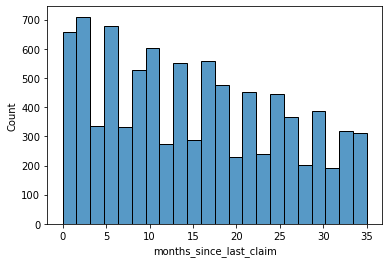

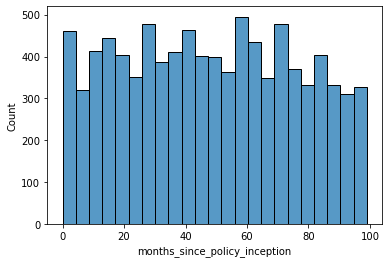

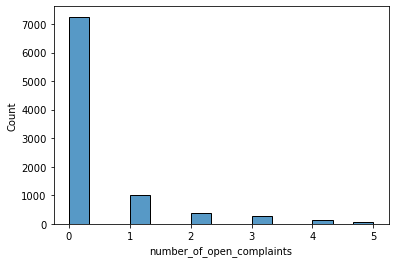

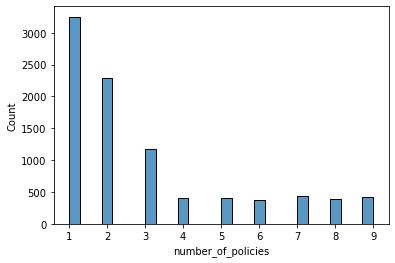

In [48]:
plot_discrete(customer_df)

In [53]:
def plot_continuous(df):
    num = df.select_dtypes('number')
    cont = []
    for x in num.columns:
        if (num[x].unique().shape[0]>100):
            cont.append(x)

    cont_df = num[cont]
    
    for col in cont_df:
        plt.figure()
        sns.boxplot(x=cont_df[col]) 

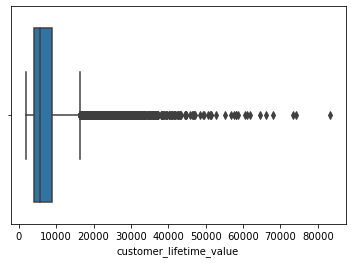

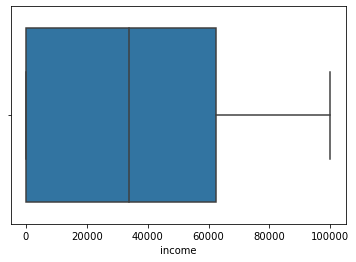

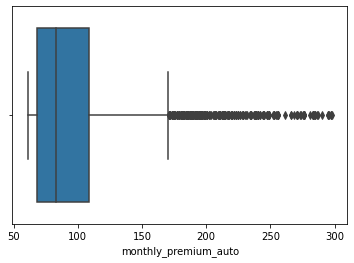

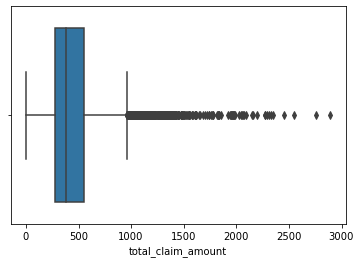

In [54]:
plot_continuous(customer_df)

#### Comment what you can see in the plots.

The data is not normally distributed. 
We have many outliers for total claim amount, monthly premium auto, customer lifetime value

In [55]:
# Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

# see boxplots above

In [ ]:
# Did you find outliers? Comment what you will do with them.

# The Boxplot shows outliers, but since there are so many of them, 
# they are a relevant part of the data set and should not be excluded, which might be an option for real outliers

In [57]:
# Check all columns for NaN values. Decide what (if anything) you will need to do with them.

customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64